<a href="https://colab.research.google.com/github/YashBelliappa-10/PRODIGY_ML/blob/main/K_means_with_Circle_diagram_T02_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61

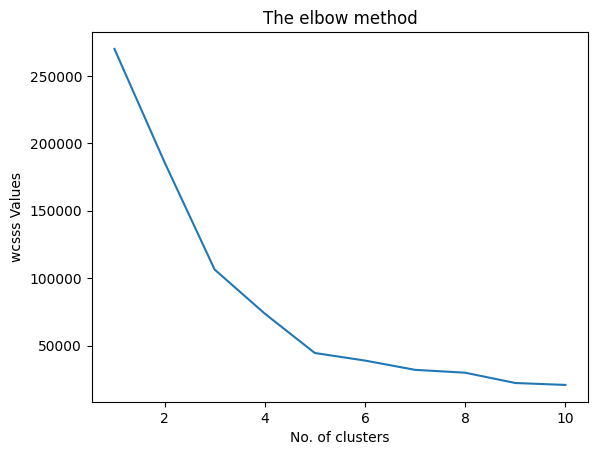

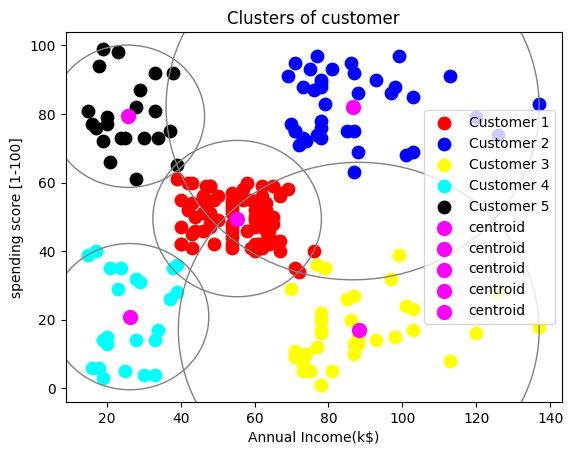

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Mall_Customers.csv')

# Divide the customer using head and tail lets take for instance first 10 memebers.
df.head(10)

df.tail()  # This code by instance gives us last 5 attributes.

# Generate dimensions.
df.shape

# To generate discription use "info" means information.
df.info()

x = df.iloc[:, [3, 4]].values
print(x)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wcsss Values')
plt.show()

kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

# Calculate the radius for each centroid based on the maximum distance to any data point in its cluster
radii = []
for cluster in range(5):
    cluster_points = x[y_kmeans == cluster]
    distances = np.linalg.norm(cluster_points - kmeansmodel.cluster_centers_[cluster], axis=1)
    radii.append(max(distances))

# Plot the clusters, centroids, and circles
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=80, c="red", label='Customer 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=80, c="blue", label='Customer 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=80, c="yellow", label='Customer 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=80, c="cyan", label='Customer 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=80, c="black", label='Customer 5')

for i in range(5):
    plt.scatter(kmeansmodel.cluster_centers_[i, 0], kmeansmodel.cluster_centers_[i, 1], s=100, c='magenta', label='centroid')
    circle = plt.Circle((kmeansmodel.cluster_centers_[i, 0], kmeansmodel.cluster_centers_[i, 1]), radius=radii[i], color='gray', fill=False)
    plt.gca().add_artist(circle)

plt.title('Clusters of customer')
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending score [1-100]')
plt.legend()
plt.show()